En esta segunda parte del trabajo se pide analizar si es posible agrupar los datos en función de algún criterio. Usaremos el algoritmo de K-Means.

Importamos las librerias:

In [1]:
!pip install pyclustertend
!pip install numba==0.53

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 117.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 108.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.3/26.3 MB 59.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.4
    Not uninstalling numpy at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'numpy'. No files were found to uninstall.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 120.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 76.4 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Otras librerías
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from pyclustertend import hopkins

## Agrupamiento

En este tipo de problemas se trata de agrupar los datos. Agruparlos de tal
forma que queden definidos N conjuntos distinguibles, aunque no
necesariamente se sepa qué signifiquen esos conjuntos.
El agrupamiento siempre será por características similares.
En esta ocasión se nos pide analizar si es posible agrupar los datos en función de algún criterio utilizando el algoritmo K-Means


#### Algoritmo de K-Means

- PASO 1: Elegir la cantidad de clusters $k$
- PASO 2: Elige al azar un centroide para cada clúster (no necesariamente un punto del data set)
- PASO 3: El algoritmo asigna cada punto al centroide más cercano para obtener clústeres iniciales
- PASO 4: Para cada clúster, el algoritmo recalcula el centroide mediante el promedio de todos los puntos del clúster
- PASO 5: K-Means vuelve a reasignar los puntos usando los nuevos centroides. Calcula nuevos
grupos
- PASO 6: El algoritmo repite el cálculo de los centroides y la asignación de puntos hasta que estos dejen de cambiar de clúster

K-Means posee diferentes hiper-parámetros que se pueden configurar:

- init: es el método de inicialización de los centroides. En este caso definimos random para que se seleccionen aleatoriamente los puntos. 

- n_clusters: definine la cantidad N de clústers que queremos como resultado.

- random_state: es la semilla de la aleatorización. En este tp la fijamos para que los resultados sean reproducibles.

Importamos de vuelta la database despues del preprocesamiento

In [3]:
ds_properati = pd.read_csv('dataset_properati_train.csv')    

#### Cómo determinar la tendencia al agrupamiento

La estadística de Hopkins (Lawson y Jurs 1990) se utiliza para evaluar la tendencia de agrupación de un
conjunto de datos midiendo la probabilidad de que un conjunto de datos dado sea generado por una
distribución de datos uniforme.
En otras palabras, prueba la aleatoriedad espacial de los datos.
La idea es comparar una muestra cualquiera con una muestra uniforme (creada de forma aleatoria) y ver
cómo se distribuyen los ejemplos (los puntos) en dicho espacio.

Funcionamiento: Sea D un conjunto de datos reales:
- PASO 1: Tomar una muestra uniformemente de n puntos $(p_1,..., p_n)$ de D
- PASO 2: Calcular la distancia ($x_i$) de cada punto real a cada vecino más cercano
- PASO 3: Generar un conjunto de datos simulados (randomD) extraído de una distribución uniforme aleatoria con n puntos ($q_1,...,q_n$) y la misma variación que el conjunto de datos reales original D
- PASO 4: Calcular la distancia ($y_i$) desde cada punto artificial hasta el punto de datos real más cercano
- PASO 5: Calcular la estadística de Hopkins (H) como: la distancia media del vecino más cercano en el conjunto de datos
aleatorios dividida por la suma de las distancias medias del vecino más cercano en el conjunto de datos real y simulado.

$H = \frac{\sum_{i=1}^{n} y_i}{\sum_{i=1}^{n} y_i+\sum_{i=1}^{n} x_i}$

Si D está distribuida de forma uniforme, entonces ∑ xi y ∑ yi serían muy parecidos, entonces H sería aproximadamente 1⁄2 (0.5).

Pero si hay clústeres en D, las distancias de los puntos artificiales ∑ yi serían mucho más grandes que las distancias de los puntos reales: ∑ xi y por lo tanto H sería mayor que 0.5.

Un valor de H superior a 0,75 indica una tendencia a la agrupación en un nivel de confianza del 90 %.

Importamos las librerias necesarias:

In [4]:
!pip install llvmlite --ignore-installed

!pip install pyclustertend
from pyclustertend import hopkins
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 72.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.53.0 requires llvmlite<0.37,>=0.36.0rc1, but you have llvmlite 0.39.1 which is incompatible.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
  Using cached numba-0.54.1-cp39-cp39-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached llvmlite-0.37.0-cp39-cp39-manylinux2014_x86_64.whl (26.3 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.53.0
    Uninstalling numba-0.53.0:
      Successfully uninstalled numba-0.53.0
You should consider upgrading via the '/root/venv/bin/pytho

Analizamos la tendencia al clustering del dataset:

In [5]:
ds_properati.head()

,Unnamed: 0,created_on,latitud,longitud,provincia,barrio,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency
0,0,2021-03-10,-34.611523,-58.410394,Capital Federal,BALVANERA,Venta,Departamento,1.0,1.0,49.0,45.0,79000.0,USD
1,1,2021-04-16,-34.621782,-58.424452,Capital Federal,ALMAGRO,Venta,Departamento,1.0,1.0,44.0,40.0,99000.0,USD
2,2,2021-08-28,-34.592425,-58.515042,Capital Federal,VILLA DEVOTO,Venta,PH,3.0,2.0,76.0,66.0,160000.0,USD
3,3,2021-11-29,-34.607836,-58.446965,Capital Federal,CABALLITO,Venta,Departamento,2.0,1.0,56.0,50.0,153000.0,USD
4,4,2021-12-17,-34.561456,-58.467606,Capital Federal,BELGRANO,Venta,Departamento,2.0,1.0,55.0,45.0,159000.0,USD


In [6]:
ds_properati.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
ds_properati_numerico = ds_properati.select_dtypes(include=np.number)
hopkins(ds_properati_numerico,ds_properati_numerico.shape[0])

0.007763679277356141

Vemos que no tiene una tendencia al agrupamiento, igualmente le aplicaremos el algoritmo.

#### ¿Cuántos conjuntos elegir?

Las métricas mas extendidas en clustering son el método de Elbow y el Índice de Silueta.

- El método de Elbow consiste básicamente en verificar la evolución de la suma de los cuadrados del error (SSE) para varias cantidades de clusters y verificar cual es el que brinda un mejor agrupamiento. En donde el gráfico presenta un "codo" (se quiebra la pendiente) es la cantidad de clusters adecuada.

- Coeficiente de Silhouette:

    Cada punto en el conjunto de datos tiene un coeficiente de Silhouette.
    Para calcular este coeficiente necesitamos calcular a(i) y b(i):

    a(i) es la distancia promedio del punto i a cada uno de los puntos de su cluster.

    b(i) es la distancia promedio del punto i a cada uno de los puntos del cluster más cercano a su propio cluster.

    Si a(i) > b(i), i está posiblemente mal clasificado.

    s(i) = b(i) - a(i) / El mayor de (b(i) o a(i))

    s(i) ≈ 1, la observación i está bien asignada a su cluster
   
    s(i) ≈ 0, la observación i está entre dos cluster

    En el peor de los casos s(i) es -1. 

Primero verificamos con el metodo de Elbow.
Corremos el algoritmo de kmeans entre 1 y 14 grupos y analizamos su error

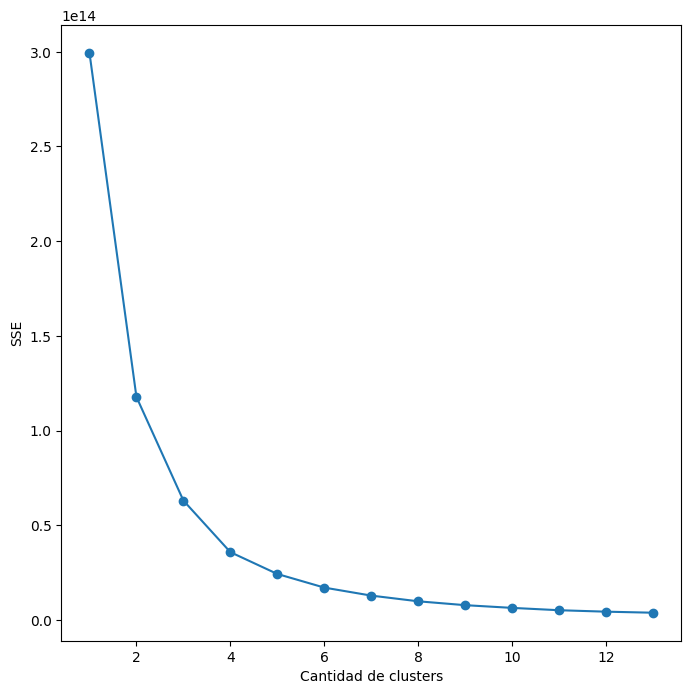

In [8]:
sse = []
list_k = list(range(1, 14))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(ds_properati_numerico)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(8, 8))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

Podemos observar que para 3 clusters el gráfico se quiebra.

#### Silhouette

Ahora veremos la calidad de los clusters utilizando un análisis de Silhouette

In [26]:
from sklearn.metrics import silhouette_score

list_k = list(range(3, 6))
for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    preds = clusterer.fit_predict(ds_properati_numerico)
    score = silhouette_score (ds_properati_numerico, preds)
    print ("Para clusters = " + str(n_clusters) + " silhouette es " + str(score))

Para clusters = 3 silhouette es 0.6587209945485236
Para clusters = 4 silhouette es 0.5812240699372571
Para clusters = 5 silhouette es 0.5741995169983759


Para k = 3 obtuvimos el mejor score.

In [10]:
!pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 KB 37.5 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


Graficamos el coeficiente de silhouette para cada observación y para diferentes valores de k. Lo que se observa de un mismo color corresponde a un mismo cluster y la recta punteada determina el silhouette promedio.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

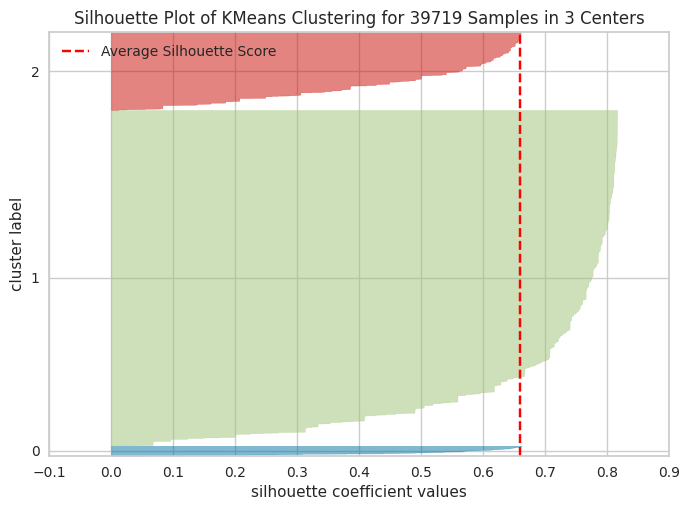

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

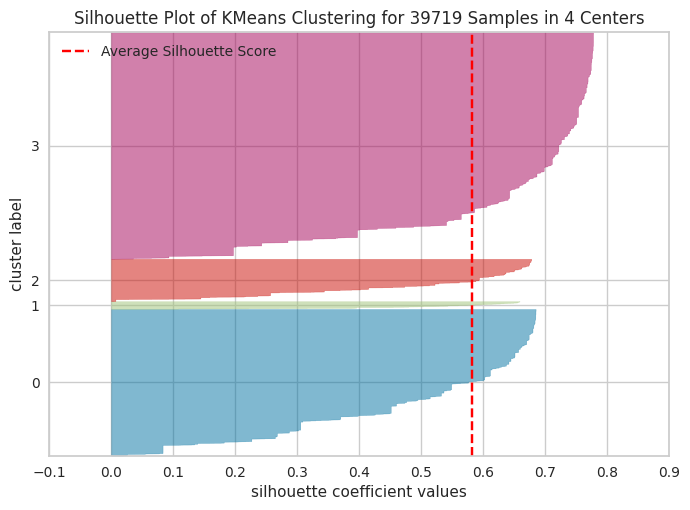

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

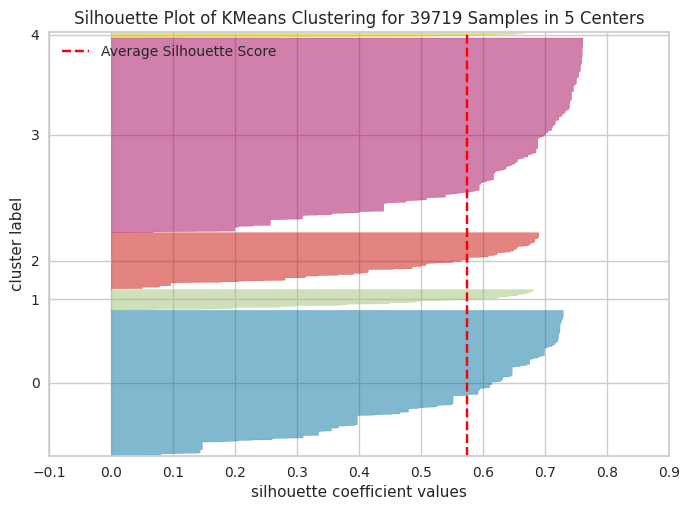

In [11]:
from yellowbrick.cluster import SilhouetteVisualizer

for k in range(3,6): 
    model = KMeans(k, random_state=0)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(ds_properati_numerico)
    plt.title(f'Silhouette con k = {k}')
    visualizer.show()

Volvemos a observar que el mejor resultado fue para k = 3 con un score promedio de aproximadamente 0.65.

Procedemos entonces a realizar el agrupamiento en 3 clusters.

#### Agrupamiento en 3 clusters

Visualizamos los grupos y sus centroides

In [12]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(ds_properati_numerico) 

y_kmeans = kmeans.predict(ds_properati_numerico)

ds_properati_numerico['kmeans_label'] = y_kmeans
ds_properati_numerico.head()

/tmp/ipykernel_1380/3642844972.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_properati_numerico['kmeans_label'] = y_kmeans


,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,kmeans_label
0,-34.611523,-58.410394,1.0,1.0,49.0,45.0,79000.0,1
1,-34.621782,-58.424452,1.0,1.0,44.0,40.0,99000.0,1
2,-34.592425,-58.515042,3.0,2.0,76.0,66.0,160000.0,1
3,-34.607836,-58.446965,2.0,1.0,56.0,50.0,153000.0,1
4,-34.561456,-58.467606,2.0,1.0,55.0,45.0,159000.0,1


In [13]:
ds_properati_numerico.shape[1] #cantidad de columnas del ds

8

Vemos el indice de las columnas:


In [14]:
idx_dic = {}
for col in ds_properati_numerico.columns:
    idx_dic[col] = ds_properati_numerico.columns.get_loc(col)
print(idx_dic)

{'latitud': 0, 'longitud': 1, 'property_rooms': 2, 'property_bedrooms': 3, 'property_surface_total': 4, 'property_surface_covered': 5, 'property_price': 6, 'kmeans_label': 7}


Para visualizar los clusters tenemos que hacerlo respecto a un par de variables. Es por esto que lo reptimos para diferentes combinaciones que nos parezcan interesantes y puedan llegar a aportarnos información. Primero definimos una funcion para graficar sobre un mapa de caba.

In [15]:
!pip install geopandas
import geopandas as gp
from seaborn import color_palette

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


Graficamos en un mapa de CABA las propiedades coloreadas según su label de k-means

In [16]:
def text():  
    plt.figtext(.75, .82, "cluster 0: violeta")
    plt.figtext(.75, .79, "cluster 1: verde")
    plt.figtext(.75, .76, "cluster 2: amarillo")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

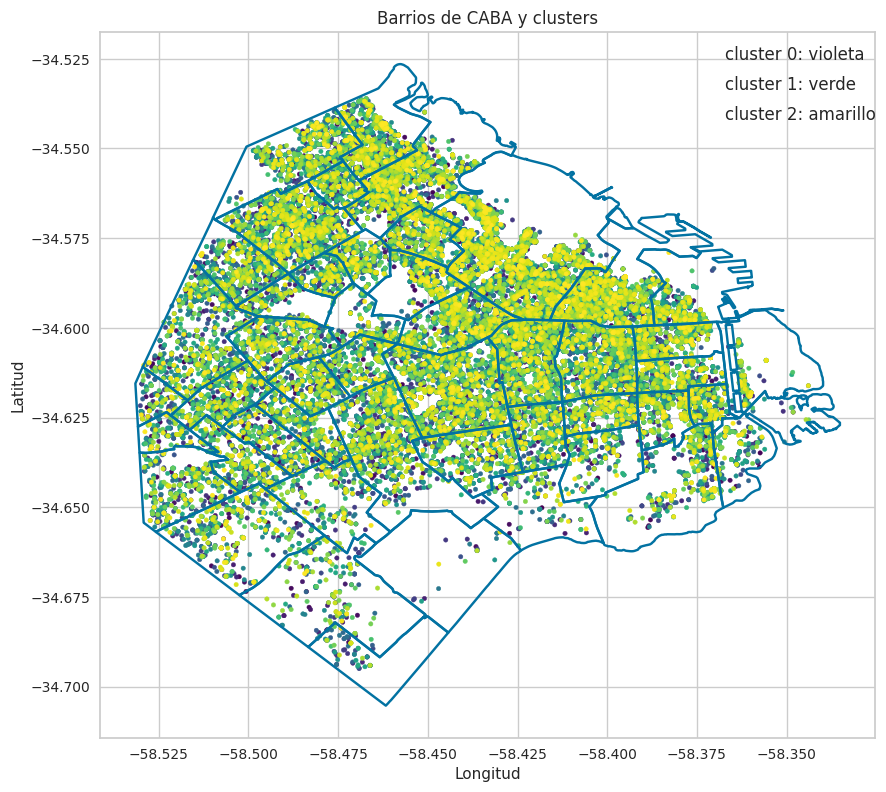

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
poligonos = gp.read_file("barrios.geojson")
ax.set_title('Barrios de CABA y clusters')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
poligonos.boundary.plot(ax=ax);

latitud = ds_properati_numerico.latitud
longitud = ds_properati_numerico.longitud
points = gp.GeoDataFrame(geometry=gp.points_from_xy(longitud,latitud))    
points.plot(ax=ax,c = ds_properati_numerico.kmeans_label, markersize=10,colormap='viridis')
plt.savefig(fname="mapaKmeans")
text()
plt.show()

A lo largo y ancho de toda la Capital, se ve una distribución uniforme de cada uno de los 3 clusters creados.

Primer par: PRECIO VS CANTIDAD DE HABITACIONES

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

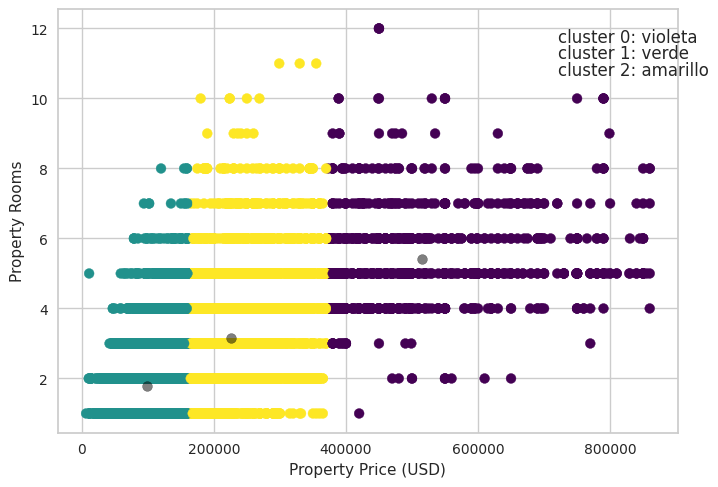

In [18]:
precio = ds_properati_numerico.iloc[:, 6]
habitaciones = ds_properati_numerico.iloc[:, 2]
plt.scatter(precio, habitaciones, c=y_kmeans, s=50, cmap='viridis')
plt.xlabel("Property Price (USD)")
plt.ylabel("Property Rooms")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 6], centers[:, 2], c='black', s=200, alpha=0.5,marker='.')
text()
plt.show()

En el grafico se aprecia la formacion de 3 clusters. Cada uno de ellos es mas grande que el anterior. Se describe a continuacion las caracteristicas de cada grupo nombrandolos por su color

Violeta: El más chico de todos los grupos, a medida que aumenta la cantidad de habitaciones disminuye la cantidad de propiedades pertenecientes a dicho grupo. Representa las propiedades que son de menor valor que en su mayoría está compuesto por las propiedades con menos ambientes.

Verde: Un intermedio entre el grupo morado y el amarillo. Se puede ver que hay una relación entre la cantidad de ambientes con el precio de la propiedad. Son de un precio intermedio y la cantidad de ambientes varía desde 1 ambiente hasta algunos pocos de 11 ambientes.

Amarillo: El mas grande de todos los grupos. Es el de mayores precios de los 3 clusters, y el grupo que mayor cantidad de propiedades con mayor cantidad de habitaciones agrupa. Además, es el que agrupa propiedades de cantidades de ambientes más alta, siendo que hay solamente unas pocas propiedades con menos de 4 ambientes.

En general se logra apreciar que a medida que aumenta el precio de una propiedad mayor es la cantidad de habitaciones que esta ofrece. Se puede apreciar también un agrupamiento por precio. Este tipo de analisis a futuro podria ayudar a hacer una clasificacion por precio (ejemplo: bajo/medio/elevado).

2do par: Cantidad de dormitorios vs Precio de la propiedad

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

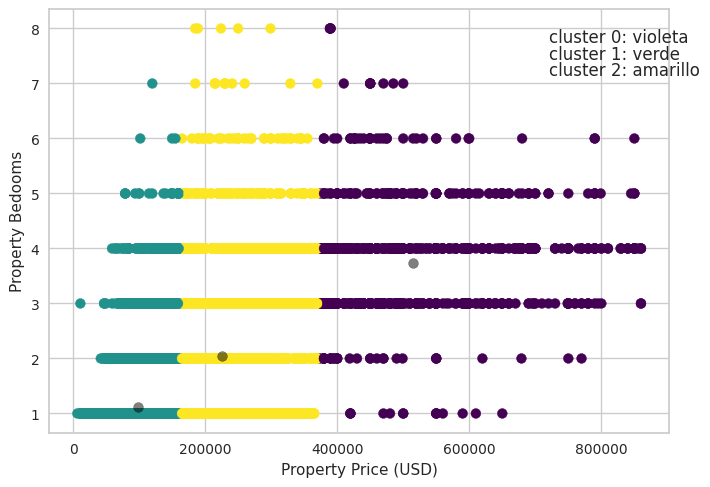

In [19]:
dormitorios = ds_properati_numerico.iloc[:, 3]
plt.scatter(precio, dormitorios, c=y_kmeans, s=50, cmap='viridis')
plt.xlabel("Property Price (USD)")
plt.ylabel("Property Bedooms")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 6], centers[:, 3], c='black', s=200, alpha=0.5,marker='.')
text()
plt.show()

Al igual que para el caso de **Cantidad de habitaciones vs Precio de la propiedad** se aprecia que de los 3 clusters formados uno es mas grande que el anterior, con la caracteristica de que el tamaño de cada cluster aumenta a medida que el precio de la propiedad es mayor (morado, turquesa, amarillo).

Se aprecia tambien, que las propiedades con mayor cantidad de dormitorios son las que mayor precio tienen. Y que los grupos mas grandes (y por lo tanto con mayores precios), tienen mayor oferta de propiedades.

Esta conclusión es de esperarse debido a la gran correlación lineal entre cantidad de ambientes y cantidad de dormitorios de las propiedades.

Tercer par: PRECIO VS SURFACE TOTAL

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

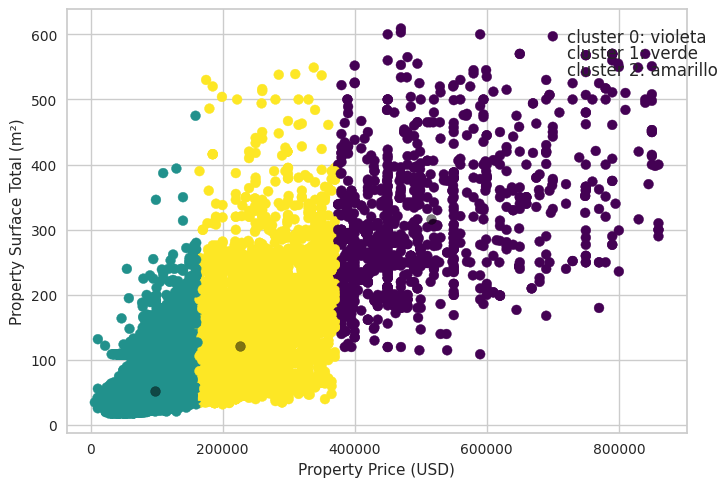

In [20]:
surface_total = ds_properati_numerico.iloc[:, 4]
plt.scatter(precio, surface_total, c=y_kmeans, s=50, cmap='viridis')
plt.xlabel("Property Price (USD)")
plt.ylabel("Property Surface Total (m²)")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 6], centers[:, 4], c='black', s=200, alpha=0.5,marker='.')
text()
plt.show()

Formacion de 3 clusters de distintos tamaños. El tamaño de cada uno depende de la variable precio de la propiedad, siendo el cluster mas grande, el que agrupa las propiedades con el mayor precio de entre los 3 grupos, además de ser el de mayor superficie total en general.

Se aprecia tambien que los grupos mas grandes son los que agrupan las propiedades con mayor superficie total, es decir, que se puede apreciar una relación entre el tamaño de una propiedad y su precio (las mas grandes suelen ser las mas costosas).

Cuarto par: PRECIO VS SURFACE COVERED

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

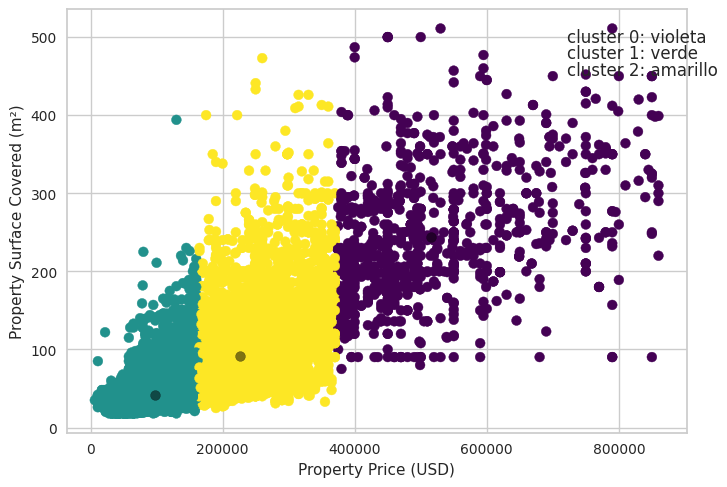

In [21]:
plt.scatter(ds_properati_numerico.iloc[:, 6], ds_properati_numerico.iloc[:, 5], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel("Property Price (USD)")
plt.ylabel("Property Surface Covered (m²)")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 6], centers[:, 5], c='black', s=200, alpha=0.5,marker='.')
text()
plt.show()

Mismo analisis que el realizado para el dispersograma anterior. Se forman 3 clusters de distintos tamaños. El tamaño de cada grupo incrementa en la medida en que el precio de la propiedad sea mas alto, y nuevamente las propiedades mas caras son las que ofrecen mayor cantidad de superficie cubierta.

Resumen:

Hasta ahora se realizaron dispersogramas relacionando algunas variables con el precio de la propiedad. Para cada caso se aprecia la formación de 3 grupos de distintos tamaños, dichos tamaños aumentaban conforme el precio de la propiedad era mayor.

En cada uno de los casos se llegó a la conclusión de que las propiedades mas costosas tienen características particulares en relación al resto, esto es, son mas grandes o tienen una mayor cantidad de dormitorios y habitaciones.

Quinto par: HABITACIONES VS SURFACE COVERED

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

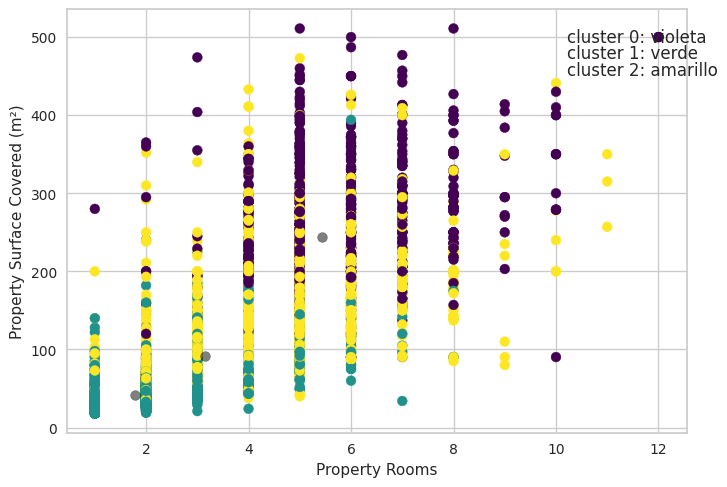

In [22]:
plt.scatter(ds_properati_numerico.iloc[:, 2], ds_properati_numerico.iloc[:, 5], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel("Property Rooms")
plt.ylabel("Property Surface Covered (m²)")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 5], c='black', s=200, alpha=0.5,marker='.')
text()
plt.show()

Se observa que la propiedades con una mayor cantidad de dormitorios son las que mayor superficie cubierta poseen. Asimismo, de los 3 grupos formados se observa que cada uno tiene una cantidad máxima de habitaciones.

Grupo morado: Propiedades de 1 a 9 habitaciones.

Grupo amarillo: Propiedades de 1 a 12 habitaciones.

Grupo turquesa: Propiedades de 1 a 11 habitaciones.

Los grupos de mayor cantidad de habitaciones contienen propiedades de mayor superficie cubierta.

Sexto par: HABITACIONES VS SURFACE TOTAL

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

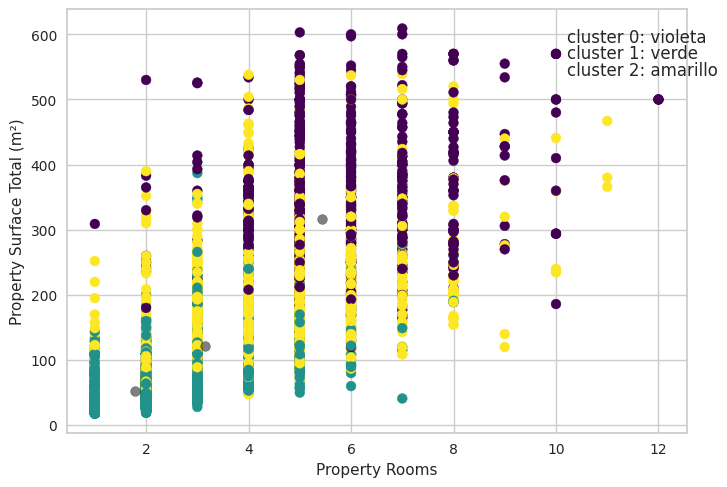

In [23]:
plt.xlabel("Property Rooms")
plt.ylabel("Property Surface Total (m²)")
plt.scatter(ds_properati_numerico.iloc[:, 2], ds_properati_numerico.iloc[:, 4], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 4], c='black', s=200, alpha=0.5,marker='.')
text()
plt.show()

Al igual que en el gráfico anterior las propiedades con mayor cantidad de habitaciones poseen una mayor cantidad de propiedades con una mayor superficie total. 

De igual forma, cada grupo formado tiene un rango de habitaciones. Un grupo es mas grande que el anterior, y cumple que a mayor cantidad de habitaciones mayor es la superficie total.

1-Grupo morado: De 1 a 9 habitaciones.

2-Grupo turquesa: De 1 a 11 habitaciones.

3-Grupo amarillo: De 1 a 12 habitaciones.

Séptimo par: HABITACIONES VS BEDROOMS

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

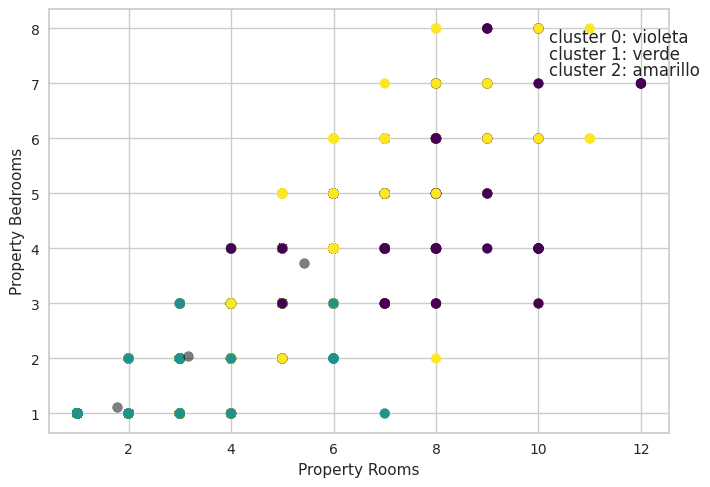

In [24]:
plt.xlabel("Property Rooms")
plt.ylabel("Property Bedrooms")
plt.scatter(ds_properati_numerico.iloc[:, 2], ds_properati_numerico.iloc[:, 3], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5,marker='.')
text()
plt.show()

Se observan 3 grupos donde las propiedades con menos ambientes son aquellas que poseen menos habitaciones:

Morado: son las propiedades que tienen menos ambientes y por lo tanto poseen menos habitaciones en la propiedad

Turquesa: es el grupo intermedio donde se puede ver que varía desde 1 hasta 8 habitaciones

Amarillo: es el grupo de propiedades que ofrece más ambientes y por lo tanto más habitaciones

Mientras la propiedad sea de más ambientes mayor será la cantidad de habitaciones que posee.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fcb02109-3268-4805-81b4-1fba96795907' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>